In [86]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/user_data/mmhender/imStat/fwrf_code_from_osf/')
from src.rf_grid import linspace, logspace
import src.numpy_utility as pnu
from src.load_nsd import image_uncolorize_fn
from scipy.io import loadmat


np.set_printoptions(precision=9)
torch.set_printoptions(precision=9)


In [2]:
print ('#device:', torch.cuda.device_count())
print ('device#:', torch.cuda.current_device())
print ('device name:', torch.cuda.get_device_name(torch.cuda.current_device()))

torch.manual_seed(time.time())
device = torch.device("cuda:0") #cuda
torch.backends.cudnn.enabled=True

print ('\ntorch:', torch.__version__)
print ('cuda: ', torch.version.cuda)
print ('cudnn:', torch.backends.cudnn.version())
print ('dtype:', torch.get_default_dtype())
#torch.set_default_dtype(torch.float64)

#device: 1
device#: 0
device name: GeForce GTX TITAN X

torch: 1.8.1+cu111
cuda:  11.1
cudnn: 8005
dtype: torch.float32


In [30]:
# test 1: start with numpy data, convert to tensor and test both methods

# using cpu seems to give same answer whether numpy or torch inverse method used
# using gpu seems to be different. 

this_device = torch.device('cpu:0')
# this_device = torch.device('cuda:0')

# np_dtype = np.float64
np_dtype = np.float32
# torch_dtype = torch.float64
torch_dtype = torch.float32

dat1 = np.random.normal(0,1,(50,50)).astype(np_dtype)
dat1_te = torch.tensor(dat1,device=this_device, dtype=torch_dtype)
dat1_te_np = dat1_te.cpu().detach().numpy().astype(np_dtype)

print(dat1[0:10,0])
print(dat1_te[0:10,0])
print(dat1_te_np[0:10,0])

print('\n')

# native numpy data, numpy inverse operation
dat_inv = np.linalg.inv(dat1)
print(dat_inv[0:10,0])
print('\n')

# data converted to tensor and using tensor inverse is different
dat_te_inv = torch.linalg.inv(dat1_te)
print(dat_te_inv[0:10,0])
print(dat_te_inv[0:10,0].cpu().detach().numpy())
print('\n')

# converting back to numpy and using numpy operation gives same as original
dat_te_np_inv = np.linalg.inv(dat1_te_np)
print(dat_te_np_inv[0:10,0])

[-1.7246039   1.3090035   0.20276114 -1.3831955   1.4845556  -0.67968565
  0.50482714 -0.6286164   1.7955669   0.20982382]
tensor([-1.724603891,  1.309003472,  0.202761143, -1.383195519,  1.484555602,
        -0.679685652,  0.504827142, -0.628616393,  1.795566916,  0.209823817])
[-1.7246039   1.3090035   0.20276114 -1.3831955   1.4845556  -0.67968565
  0.50482714 -0.6286164   1.7955669   0.20982382]


[ 0.10150663  -0.26149267   0.2643254   -0.060248516  0.023584941
  0.23450518   0.29662147   0.10549881  -0.23475654  -0.05797229 ]


tensor([ 0.101505548, -0.261491716,  0.264323890, -0.060248271,  0.023584634,
         0.234503701,  0.296620011,  0.105497740, -0.234755337, -0.057971876])
[ 0.10150555  -0.26149172   0.2643239   -0.06024827   0.023584634
  0.2345037    0.29662      0.10549774  -0.23475534  -0.057971876]


[ 0.10150663  -0.26149267   0.2643254   -0.060248516  0.023584941
  0.23450518   0.29662147   0.10549881  -0.23475654  -0.05797229 ]


(0.0, 50.0, 0.0, 50.0)

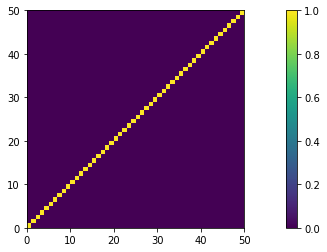

In [31]:
# should be identity matrix
test = dat1 @ dat_inv
plt.figure();
plt.pcolormesh(test)
plt.colorbar()
plt.axis('square')

(0.0, 50.0, 0.0, 50.0)

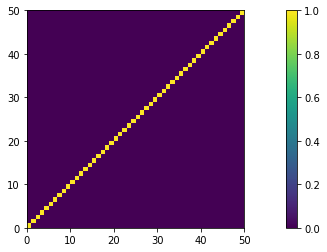

In [32]:
# should be identity matrix
test = torch.mm(dat1_te,dat_te_inv).cpu().detach().numpy()
plt.figure();
plt.pcolormesh(test)
plt.colorbar()
plt.axis('square')

In [68]:
# test 2: starting with torch data, convert to numpy and test both methods

# using cpu seems to give same answer whether numpy or torch inverse method used
# using gpu seems to be different. 

this_device = torch.device('cpu:0')
# this_device = torch.device('cuda:0')
# 
# np_dtype = np.float64
np_dtype = np.float32
# torch_dtype = torch.float64
torch_dtype = torch.float32
# torch_dtype = torch.double

dat1 = torch.randn(size=(50,50), dtype=torch_dtype, device=this_device) + torch.eye(50,50, device=this_device, dtype=torch_dtype) * 10e-10
dat1_np = dat1.cpu().detach().numpy()
dat1_np_te = torch.tensor(dat1_np,device=this_device, dtype=torch_dtype)

print(dat1[0:10,0])
print(dat1_np[0:10,0])
print(dat1_np_te[0:10,0])

print('\n')

# native torch data that was converted to numpy, numpy inverse operation
dat_inv = torch.linalg.inv(dat1)
print(dat_inv[0:10,0])
print('\n')

# data converted to tensor and using tensor inverse is different
dat_np_inv = np.linalg.inv(dat1_np)
print(dat_np_inv[0:10,0])
print('\n')

# converting back to numpy and using numpy operation gives same as original
dat_np_te_inv = torch.linalg.inv(dat1_np_te)
print(dat_np_te_inv[0:10,0])

tensor([-0.868057668,  0.951501667,  0.242484525, -0.464339197,  1.150083065,
        -1.898098707, -1.471829176,  0.579506099,  1.157276988, -0.839377999])
[-0.86805767  0.95150167  0.24248452 -0.4643392   1.1500831  -1.8980987
 -1.4718292   0.5795061   1.157277   -0.839378  ]
tensor([-0.868057668,  0.951501667,  0.242484525, -0.464339197,  1.150083065,
        -1.898098707, -1.471829176,  0.579506099,  1.157276988, -0.839377999])


tensor([ 0.014071587,  0.034809094,  0.067538433,  0.015735798,  0.099441528,
        -0.067779429, -0.039659414,  0.046042811,  0.023845939, -0.090086363])


[ 0.014071638  0.03480915   0.06753841   0.015735775  0.09944161
 -0.06777941  -0.039659552  0.046042815  0.023845926 -0.09008628 ]


tensor([ 0.014071587,  0.034809094,  0.067538433,  0.015735798,  0.099441528,
        -0.067779429, -0.039659414,  0.046042811,  0.023845939, -0.090086363])


(0.0, 50.0, 0.0, 50.0)

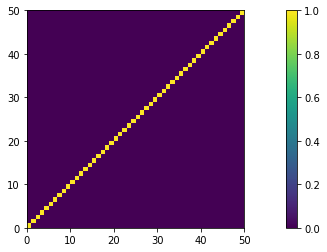

In [69]:
# should be identity matrix
test = torch.mm(dat1, dat_inv).cpu().detach().numpy()
plt.figure();
plt.pcolormesh(test)
plt.colorbar()
plt.axis('square')

(0.0, 50.0, 0.0, 50.0)

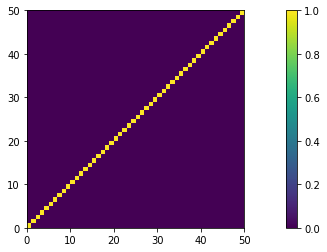

In [70]:
# should be identity matrix
test = dat1_np @ dat_np_inv
plt.figure();
plt.pcolormesh(test)
plt.colorbar()
plt.axis('square')

In [ ]:
# testing with real data below...


In [88]:
# Getting the actual validation set data for this voxel of interest now

from src.load_nsd import image_uncolorize_fn, data_split, load_betas

nsd_root = "/lab_data/tarrlab/common/datasets/NSD/"
stim_root = '/user_data/mmhender/nsd_stimuli/stimuli/nsd/'    
beta_root = nsd_root + "nsddata_betas/ppdata/"
up_to_sess = 20

exp_design_file = nsd_root + "nsddata/experiments/nsd/nsd_expdesign.mat"
exp_design = loadmat(exp_design_file)
ordering = exp_design['masterordering'].flatten() - 1 # zero-indexed ordering of indices (matlab-like to python-like)
    
### LOADING DATA ####
print('Loading data for sessions 1:%d...'%up_to_sess)
beta_subj = beta_root + "subj%02d/func1pt8mm/betas_fithrf_GLMdenoise_RR/" % (subject,)

voxel_data, filenames = load_betas(folder_name=beta_subj, zscore=True, voxel_mask=voxel_mask, up_to=up_to_sess, load_ext=".nii")
print('\nSize of full data set [nTrials x nVoxels] is:')
print(voxel_data.shape)

import h5py
image_data = {}
image_data_set = h5py.File(stim_root + "S%d_stimuli_227.h5py"%subject, 'r')
image_data = np.copy(image_data_set['stimuli'])
image_data_set.close()

data_size, n_voxels = voxel_data.shape 
trn_stim_data, trn_voxel_data,\
val_stim_single_trial_data, val_voxel_single_trial_data,\
val_stim_multi_trial_data, val_voxel_multi_trial_data = \
    data_split(image_uncolorize_fn(image_data), voxel_data, ordering, imagewise=False)
n_trials_val = val_stim_single_trial_data.shape[0]
print(n_trials_val)

In [89]:
nsd_root = "/lab_data/tarrlab/common/datasets/NSD/"
stim_root = '/user_data/mmhender/nsd_stimuli/stimuli/nsd/'
mask_root = nsd_root + "nsddata/ppdata/"

subject = 1
saveext = ".png"
savearg = {'format':'png', 'dpi': 120, 'facecolor': None}
# timestamp = 'May-03-2021_0134'
# timestamp = 'May-04-2021_0340'
# timestamp = 'May-09-2021_2309'
# timestamp = 'May-10-2021_1849'
timestamp = 'May-16-2021_1422'
# timestamp = time.strftime('%b-%d-%Y_%H%M', time.localtime())
model_name = 'gabor_fwrf'

root_dir   = os.path.dirname(os.getcwd())
net_dir    = root_dir + "net/" 

# input_dir  = '/home/styvesg/repo.data/results/nsd/torch_fwrf_full_brain/S%02d/dnn_fwrf_May-10-2020_1814/'
output_dir = os.path.join(root_dir, 'gabor_model_fits','S%02d'%subject,'%s_%s/'% (model_name,timestamp) )

In [90]:
# Loading the results of model fitting performed with fit_model.py

fns = os.listdir(output_dir)
fns = [fn for fn in fns if 'model_params' in fn]
print(fns)
out = torch.load(os.path.join(output_dir, fns[0]))
print(out.keys())

['model_params_allROIs']
dict_keys(['feature_table', 'sf_tuning_masks', 'ori_tuning_masks', 'cyc_per_stim', 'orients_deg', 'orient_filters', 'aperture', 'models', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'best_params', 'lambdas', 'best_lambdas', 'best_losses', 'val_cc', 'val_r2', 'features_each_model_val', 'covar_each_model_training', 'voxel_feature_correlations_val', 'zscore_features', 'nonlin_fn', 'debug'])


In [91]:
# Pulling out useful elements from the saved data

feature_table = out['feature_table']
orient_list = np.round(np.array(feature_table['orientation'])/np.pi*180,1)
a,orient_ind_list = np.unique(orient_list,return_inverse=True)
sf_list = np.array(feature_table['cycles per stimulus'])
a,sf_ind_list = np.unique(sf_list,return_inverse=True)

aperture = out['aperture']
cyc_per_stim  = out['cyc_per_stim']
orients_deg = out['orients_deg']

sf_tuning_masks = out['sf_tuning_masks']
ori_tuning_masks = out['ori_tuning_masks']
orient_filters = out['orient_filters']

voxel_mask = out['voxel_mask']
brain_nii_shape = out['brain_nii_shape']
image_order = out['image_order']
voxel_idx = out['voxel_index']
voxel_roi = out['voxel_roi']

val_cc = out['val_cc']
best_params = out['best_params']
best_lambdas = out['best_lambdas']
best_losses = out['best_losses']
lambdas = out['lambdas']

features_each_model_val = out['features_each_model_val']
voxel_feature_correlations_val = out['voxel_feature_correlations_val']
covar_each_model_training = out['covar_each_model_training']
                                    
zscore_features = out['zscore_features']
# nonlin_fn = out['normalize_fn']
nonlin_fn = out['nonlin_fn']

# Best params[0] = x,y,sigma for pRF estimates [n_voxels x 3]
print(np.shape(best_params[0]))
# Best params[1] = best weights [n_voxels x nFeatures]
print(np.shape(best_params[1]))

best_models = best_params[0]
best_ecc  = np.sqrt(np.square(best_models[:,0]) + np.square(best_models[:,1]))
best_ang  = np.arctan2(best_models[:,1], best_models[:,0])
best_size = best_models[:,2]

feature_weights = best_params[1]

n_sf = len(cyc_per_stim)
n_ori = len(orients_deg)
n_voxels = np.shape(feature_weights)[0]
n_features_total = np.shape(feature_weights)[1]

(11694, 3)
(11694, 432)


In [98]:
# For one example voxel, get its actual pRF parameters

vidx = np.argsort(np.nan_to_num(val_cc))[-1] # choosing vox w best validation set performance

aperture = np.float32(1)
smin, smax = np.float32(0.04), np.float32(0.4)
n_sizes = 8

from src.rf_grid import model_space_pyramid
# models is three columns, x, y, sigma
models = model_space_pyramid(logspace(n_sizes)(smin, smax), min_spacing=1.4, aperture=1.1*aperture)    

best_model_ind = np.where(np.sum(models==best_models[vidx],axis=1)==3)[0][0]
print(models[best_model_ind])

print(best_models[vidx])

# and get the features for each validation set trial, based on this pRF
val_features_actual = features_each_model_val[:,:,best_model_ind]
print(np.shape(val_features_actual))

[0.260526316 0.376315789 0.039999999]
[0.260526316 0.376315789 0.039999999]
(1491, 432)


In [93]:
def _cofactor_fn(_x, lambdas, device):
    '''
    Generating a matrix needed to solve ridge regression model for each lambda value.
    Ridge regression (Tikhonov) solution is :
    w = (X^T*X + I*lambda)^-1 * X^T * Y
    This func will return (X^T*X + I*lambda)^-1 * X^T. 
    So once we have that, can just multiply by training data (Y) to get weights.
    returned size is [nLambdas x nFeatures x nTrials]
    '''
    _f = torch.stack([(torch.mm(torch.t(_x), _x) + torch.eye(_x.size()[1], device=device) * l).inverse() for l in lambdas], axis=0) 
    
    # [#lambdas, #feature, #feature]       
    return torch.tensordot(_f, _x, dims=[[2],[1]]) # [#lambdas, #feature, #sample]



def _cofactor_fn_cpu(_x, lambdas):
    '''
    Generating a matrix needed to solve ridge regression model for each lambda value.
    Ridge regression (Tikhonov) solution is :
    w = (X^T*X + I*lambda)^-1 * X^T * Y
    This func will return (X^T*X + I*lambda)^-1 * X^T. 
    So once we have that, can just multiply by training data (Y) to get weights.
    returned size is [nLambdas x nFeatures x nTrials]
    This version makes sure that the torch inverse operation is done on the cpu, and in floating point-64 precision.
    Otherwise get bad results for small lambda values. This seems to be a torch-specific bug.
    
    '''
    device_orig = _x.device
    type_orig = _x.dtype
    # switch to this specific format which works with inverse
    _x = _x.to('cpu').to(torch.float64)
    _f = torch.stack([(torch.mm(torch.t(_x), _x) + torch.eye(_x.size()[1], device='cpu', dtype=torch.float64) * l).inverse() for l in lambdas], axis=0) 
    
    # [#lambdas, #feature, #feature] 
    cof = torch.tensordot(_f, _x, dims=[[2],[1]]) # [#lambdas, #feature, #sample]
    
    # put back to whatever way it was before, so that we can continue with other operations as usual
    return cof.to(device_orig).to(type_orig)

In [105]:
# Testing ridge regression code on validation set data.
# want to make sure we can get numbers that make sense, for the validation set at least as a sanity check.
# this is mostly because of issues with small lambda values.

val_resp_actual = val_voxel_single_trial_data[:,vidx:vidx+1]

from src.torch_fwrf import _to_torch, get_value, _loss_fn

device2use = 'cpu'
# device2use = 'cuda:0'

feat = np.concatenate([val_features_actual, np.ones((np.shape(val_features_actual)[0],1))], axis=1)
# feat = np.concatenate([scipy.stats.zscore(val_features_actual,0), np.ones((np.shape(val_features_actual)[0],1))], axis=1)

lambdas2use = [0.0]

_xval = _to_torch(feat, device=device2use)
# _cof = _cofactor_fn(_xval, lambdas2use, device=device2use) # this other version of the function produces wrong result for small lambda

_cof = _cofactor_fn_cpu(_xval, lambdas2use)
_vval = _to_torch(val_resp_actual, device=device2use)
_betas, _loss = _loss_fn(_cof, _vval, _xval, _vval) 
lind = np.argmin(get_value(_loss))
w_est = get_value(_betas[lind,:,0])

print(_cof[0,0:10,0])
print(w_est[0:5])
val_resp_predicted = feat @ w_est
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])

lambdas2use = [0.2]

_xval = _to_torch(feat, device=device2use)
_cof = _cofactor_fn_cpu(_xval, lambdas2use)
# _cof = _cofactor_fn(_xval, lambdas2use, device=device2use)
_vval = _to_torch(val_resp_actual, device=device2use)
_betas, _loss = _loss_fn(_cof, _vval, _xval, _vval) 
lind = np.argmin(get_value(_loss))
w_est = get_value(_betas[lind,:,0])

print(_cof[0,0:10,0])
print(w_est[0:5])
val_resp_predicted = feat @ w_est
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])


tensor([ 14.422679901, -10.895202637,   4.766335011,  -1.210224628,
          0.057777971,   4.800389767, -12.797785759,  12.394459724,
         -4.709238052,  -1.630437255])
[-134.03748    29.89389   -30.159607  131.58377  -266.64252 ]
0.8307243773952299
tensor([ 0.009595385,  0.006477968,  0.004568197,  0.004321412,  0.002626577,
        -0.005706073, -0.019452760, -0.013909949, -0.000340931,  0.007150298])
[-0.6420409  -0.27733228  0.47216395  1.1100531   1.1307842 ]
0.5973523397063815


torch.float32


(0.0, 433.0, 0.0, 433.0)

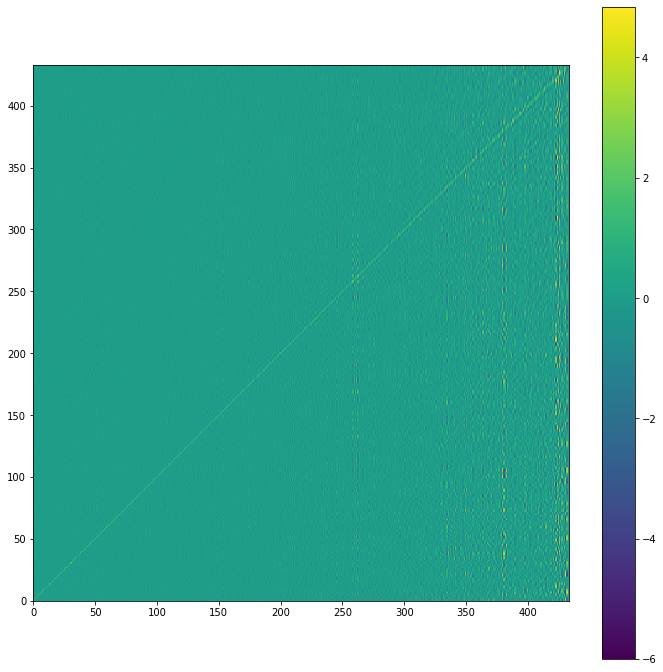

In [110]:
# checking exactly why error happens for small lambda values

# device2use = 'cpu'
device2use = 'cuda:0'
# type1 = torch.float64
type1 = torch.float32

lambdas2use = [0.0]
# lambdas2use = [0.1]
feat = np.concatenate([val_features_actual, np.ones((np.shape(val_features_actual)[0],1))], axis=1)
_xval = _to_torch(feat, device=device2use)
_x = _xval
lambdas = lambdas2use
device=device2use
dtype=type1

_x = _x.to(dtype)

lambdas = torch.tensor(lambdas).to(dtype)

# mat2invert = torch.mm(torch.t(_x), _x)
mat2invert = torch.mm(torch.t(_x), _x) + torch.eye(_x.size()[1], device=device, dtype=dtype) * lambdas[0]
# mat2invert = torch.eye(_x.size()[1], device=device, dtype=dtype) * lambdas[0]
# mat2invert = torch.randn(size=mat2invert.shape, device=device, dtype=dtype) + torch.eye(_x.size()[1], device=device, dtype=dtype) * lambdas[0]
# inverted = mat2invert.inverse()
# inverted = torch.linalg.tensorinv(mat2invert, ind=1)
inverted = torch.linalg.pinv(mat2invert)

print(_x.dtype)

plt.figure(figsize=(12,12));
test = torch.mm(mat2invert, inverted).cpu().detach().numpy()
plt.pcolormesh(test)
plt.colorbar()
plt.axis('square')

In [114]:
def solve_ols(x, y):
    
    weights = np.linalg.inv(np.transpose(x) @ x) @ np.transpose(x) @ y    
    return weights

def solve_ridge_regression(x, y, lamdba_value):
    
    nfeatures = np.shape(x)[1]    
    weights = np.linalg.inv(np.transpose(x) @ x + np.identity(nfeatures)*lambda_value) @ np.transpose(x) @ y    
    cof = np.linalg.inv(np.transpose(x) @ x + np.identity(nfeatures)*lambda_value) @ np.transpose(x)
    
    return cof, weights

In [112]:
# Testing basic ridge regression solution

lambda_value = 0

cof, w_est_ridge = solve_ridge_regression(feat, val_resp_actual, lambda_value)
np.shape(w_est_ridge)
print(cof[0:5,0])
print(w_est_ridge[0:5])
val_resp_predicted = feat @ w_est_ridge
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])

lambda_value = 0.2

cof, w_est_ridge = solve_ridge_regression(feat, val_resp_actual, lambda_value)
np.shape(w_est_ridge)
print(cof[0:5,0])
print(w_est_ridge[0:5])
val_resp_predicted = feat @ w_est_ridge
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])


[ 14.422679446 -10.89520224    4.766334995  -1.210224777   0.057778144]
[[-134.037504191]
 [  29.89387558 ]
 [ -30.159678516]
 [ 131.583781545]
 [-266.642534311]]
0.8307243802321372
[0.009595385 0.006477968 0.004568197 0.004321412 0.002626577]
[[-0.642040859]
 [-0.277332272]
 [ 0.47216397 ]
 [ 1.110053053]
 [ 1.130784161]]
0.5973523401071524


In [113]:
# Testing basic OLS solution (lambda = 0)

w_est_ols1 = np.linalg.lstsq(feat, val_resp_actual)[0]
np.shape(w_est_ols1)
print(w_est_ols1[0:5])
val_resp_predicted = feat @ w_est_ols1
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])


w_est_ols2 = solve_ols(feat, val_resp_actual)
np.shape(w_est_ols2)
print(w_est_ols2[0:5])
val_resp_predicted = feat @ w_est_ols2
print(np.corrcoef(np.transpose(val_resp_actual), np.transpose(val_resp_predicted))[0,1])


[[-134.037516366]
 [  29.893861573]
 [ -30.159658093]
 [ 131.583766249]
 [-266.642526983]]
0.830724380232137
[[-134.037504191]
 [  29.89387558 ]
 [ -30.159678516]
 [ 131.583781545]
 [-266.642534311]]
0.8307243802321372


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
